In [78]:
import kwant
import matplotlib.pyplot as pyplot
import scipy.sparse.linalg as sla
import numpy as np
%matplotlib notebook

In [79]:
sys = kwant.Builder()

In [80]:
a = 1
lat = kwant.lattice.square(a)

In [81]:
mu = 0 #trivial: 1, 0, 0.1; disorder affects this principally. may affect hopping too, sometimes. ions change the energies.
t = 1
delta = 1
W = 1
L = 10

In [82]:
 for i in range(L):
        for j in range(W):
            if(j == 0):
                sys[lat(i,j)] = -mu 
                
                #sys[lat(i,j-1),lat(i,j)] = t #Vertical Hopping
            if (j == 1):
                sys[lat(i,j)] = mu
                
            if (i > 0) and (j > 0):
                sys[lat(i-1,j-1),lat(i,j)] = delta #Bot Left to Top Right Diagonal 
                sys[lat(i-1,j),lat(i,j-1)] = -delta #Top Left to Bot right Diagonal 
                sys[lat(i-1,j),lat(i,j)] = t #Lateral Hopping
           
            if (i > 0) and (j == 0):
                sys[lat(i-1,j),lat(i,j)] = -t #Lateral Hopping
        
            
            

<IPython.core.display.Javascript object>


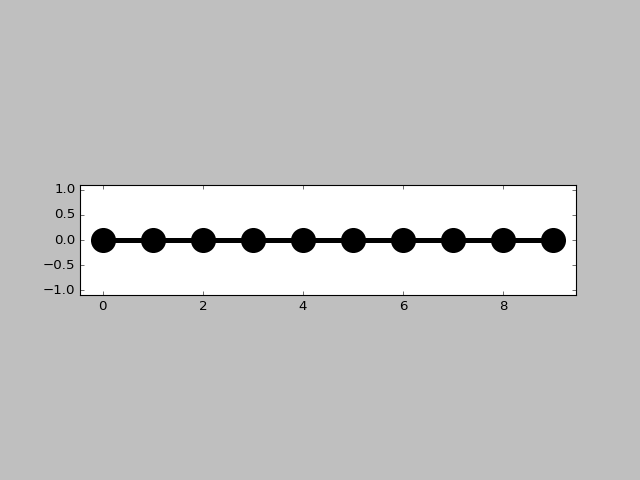

<IPython.core.display.Javascript object>


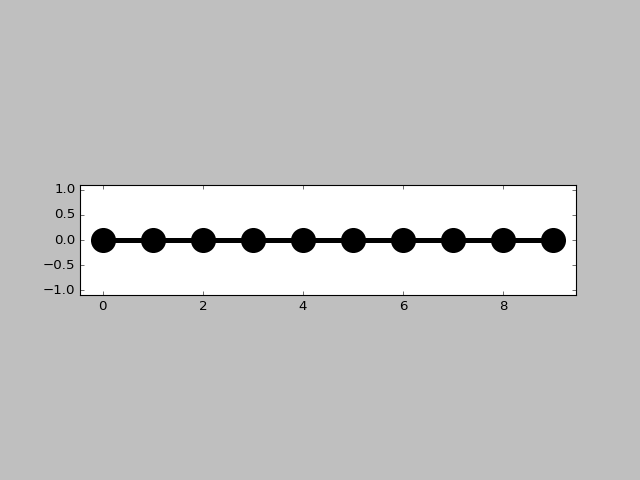

In [83]:
kwant.plot(sys.finalized())

In [84]:
def energy(t, mu, delta, W, L): #def energy(t, mu, W, L): #np.random seed <-- use constant seed 
    sys = kwant.Builder() #in near future, universalize by using lat_e and lat_h; - values will be lat_h.
    a = 1
    lat = kwant.lattice.square(a)
    for i in range(L):
        for j in range(W):
            if(j == 0):
                sys[lat(i,j)] = -mu 
                
                #sys[lat(i,j-1),lat(i,j)] = t #Vertical Hopping
            if (j == 1):
                sys[lat(i,j)] = mu
                
            if (i > 0) and (j > 0):
                sys[lat(i-1,j-1),lat(i,j)] = delta #Bot Left to Top Right Diagonal 
                sys[lat(i-1,j),lat(i,j-1)] = -delta #Top Left to Bot right Diagonal 
                sys[lat(i-1,j),lat(i,j)] = t #Lateral Hopping
           
            if (i > 0) and (j == 0):
                sys[lat(i-1,j),lat(i,j)] = -t #Lateral Hopping
                
    ham_mat = sys.finalized().hamiltonian_submatrix(sparse=True)
    ev = sla.eigsh(ham_mat, k=6, which='SM', return_eigenvectors=False, maxiter = 100000) #k=5
    return ev

In [97]:
np.sort(energy(1, 0, 1.01, 1, 100)) #t, mu, delta, W, L; to remove random wiggles; changing the values will update variables

array([-0.15536769, -0.09328078, -0.03110362,  0.03110362,  0.09328078,
        0.15536769])

In [86]:
def plot_energies(trange, mu, delta, W, L): #def plot_energies(trange, mu, W, L):

    energies = []
    
    for t in trange:
        
        energies.append(np.sort(energy(t, mu, delta, W, L))) 

    pyplot.figure()
    pyplot.plot(trange, energies)
    pyplot.show()


<IPython.core.display.Javascript object>


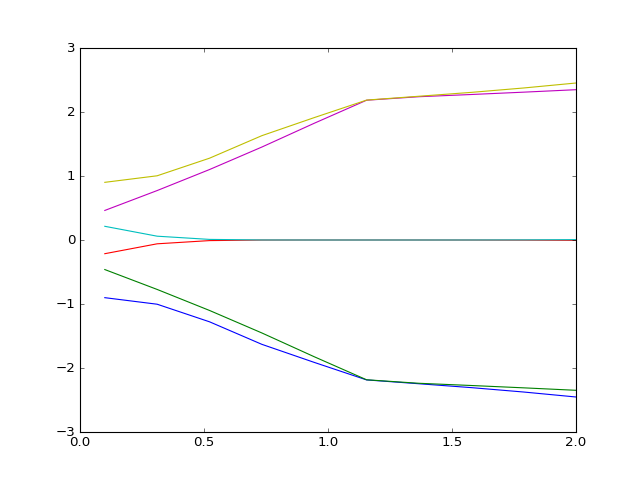

In [87]:
trange = np.linspace(0.1, 2, 10) #start at 0.1, end at 2, generate 100 samples. End = 1 produces slanted straight lines.
#deltarange = np.linspace(0.1, 3, 100)
plot_energies(trange, 0.1, 1.1, 2, 10)#array of t's, mu, W, L; plot_energies(trange, 0.1, 2, 10)

In [88]:
#Plotting Energy



#future: use Bogolyubov-de Gennes Transformation
#far future: How does disorder affect topological insulation?